<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81/%EB%84%A4%EC%9D%B4%EB%B2%84_%EA%B2%80%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 실험

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime

In [ ]:
def get_naver_news_title():
  topic = input("검색어 입력: ")
  num = int(input("최대 검색 페이지 수(10단위) 입력: "))
  headers = {'User-agent': 'Mozilla/5.0'}
  result_df = pd.DataFrame()

  for page in range(1, num, 10):
    url = f"https://search.naver.com/search.naver?where=news&query={topic}&start="+str(page)
    response = requests.get(url=url, headers = headers)
    soup = BeautifulSoup(response.text, 'lxml')
    news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})]
    news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
    dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일

    df = pd.DataFrame({'기사작성일':dates,'기사제목':news_title,'기사주소':news_url})
    result_df = pd.concat([result_df, df], ignore_index=True)
    return result_df

In [ ]:
result = get_naver_news_title()

KeyboardInterrupt: ignored

In [ ]:
result

# 이게 낫네
참고 코드: https://arehoow.tistory.com/9

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime

In [ ]:
page = 1
result_df = pd.DataFrame()
# 여기만 바꿔주기
topic = "건축"
start = "2011.01.01"
end = "2012.06.01"

while True:
    try:
        url = f'https://search.naver.com/search.naver?&where=news&query={topic}&photo=0&field=0&reporter_article=&pd=3&ds={start}&de={end}&start={page}'
        headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
        news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
        dates = [date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
        news_date = []
        for date in dates:
            if re.search(r'\d+.\d+.\d+', date) != None: # 기사 작성일 정제
                news_date.append(date)
        
        df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
        result_df = pd.concat([result_df, df], ignore_index=True)
        page += 10
    
    except: # 오류발생시 몇 페이지까지 크롤링했는지 page를 확인하기 
        print(page)
        break

1401


In [ ]:
result_df #뭔가 이상한데 되긴됨

,기사작성일,기사제목,기사주소
0,2012.06.01.,"케네디家, '건축의 도시' 시카고에 초고층 빌딩",https://news.naver.com/main/read.naver?mode=LS...
1,2012.05.31.,`건축학개론` 불법 파일 유출·유포자 검거,http://starin.edaily.co.kr/news/NewsRead.edy?n...
2,2012.06.01.,"광진구, 건축공사장 환경정비",http://www.asiae.co.kr/news/view.htm?idxno=201...
3,2012.06.01.,"[속보] 개발제한구역에 진입도로 없이 해준 건축허가, 감사 착수",http://news1.kr/articles/689353
4,2012.05.31.,400만관객 '건축학개론' 불법 유포자 검거,http://star.moneytoday.co.kr/view/stview.php?n...
...,...,...,...
1395,2012.05.31.,"LG하우시스, 고강도 WFC 합성목재 출시",http://www.etnews.com/news/device/device/25965...
1396,2012.04.27.,경동교회 건물에 담긴 김수근의 건축 철학,https://news.naver.com/main/read.naver?mode=LS...
1397,2012.04.25.,'바보 건축가' 정기용,http://www.kyeongin.com/news/articleView.html?...
1398,2012.05.31.,중소제조업 가동률 두달만에 꺽여,http://www.kgnews.co.kr/news/articleView.html?...


# 텍스트 분석

In [ ]:
!pip install jpype1
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
title = result_df['기사제목']

In [ ]:
Noun = []

for i in range(len(title)-1):
  word = okt.nouns(title[i])
  Noun.append(word) #형태소가 명사인 것만 추출

In [ ]:
Noun

[['케네디', '건축', '도시', '시카고', '초고', '층', '빌딩'],
 ['건축학개론', '불법', '파일', '유출', '유포자', '검거'],
 ['광진구', '건축', '사장', '환경', '정비'],
 ['속보', '개발', '구역', '진입', '도로', '건축', '허가', '감사', '착수'],
 ['건축학개론', '불법', '유포자', '검거'],
 ['건축학개론', '유포자', '명', '불구속', '입건'],
 ['희림', '종합', '건축', '방글라데시', '규모', '계약', '체결'],
 ['건축학개론', '세대', '문화', '진화'],
 ['원주', '영상', '미디어', '센터', '말', '건축가', '상영'],
 ['금기', '바', '모래', '건축', '현장', '유통'],
 ['건축학개론', '세대', '문화', '진화'],
 ['원주', '영상', '미디어', '센터', '말', '건축가', '상영'],
 ['호남권', '건축', '도시', '정책', '포럼'],
 ['일산', '소방', '고양시', '건축', '사회', '주택', '화재', '예방'],
 ['금기', '바', '모래', '유통', '부실', '건축', '우려'],
 ['케미칼', '친환경', '건축물', '에코', '랩', '인기', '만발'],
 ['희림', '종합', '건축', '방글라데시', '규모', '계약', '체결'],
 ['포토', '궁궐', '건축', '품격', '창덕궁', '연경', '보물', '지정'],
 ['금기', '바', '모래', '건축', '현장', '유통'],
 ['초과', '건축', '비'],
 ['포토', '뉴스', '상수', '일대', '펜션', '건축', '결사', '반대'],
 ['친환경', '목조', '건축', '캐나다', '산', '목재', '전도사'],
 ['건축학', '개론', '동영상', '파일', '불법', '유출', '피해', '눈덩이'],
 ['인도네시아', '건축', '심의', '위원회

In [ ]:
Noun[:10]

[['케네디', '건축', '도시', '시카고', '초고', '층', '빌딩'],
 ['건축학개론', '불법', '파일', '유출', '유포자', '검거'],
 ['광진구', '건축', '사장', '환경', '정비'],
 ['속보', '개발', '구역', '진입', '도로', '건축', '허가', '감사', '착수'],
 ['건축학개론', '불법', '유포자', '검거'],
 ['건축학개론', '유포자', '명', '불구속', '입건'],
 ['희림', '종합', '건축', '방글라데시', '규모', '계약', '체결'],
 ['건축학개론', '세대', '문화', '진화'],
 ['원주', '영상', '미디어', '센터', '말', '건축가', '상영'],
 ['금기', '바', '모래', '건축', '현장', '유통']]

In [ ]:
from functools import reduce
words = list(reduce(lambda x, y: x+y,Noun))
print(words)  

['케네디', '건축', '도시', '시카고', '초고', '층', '빌딩', '건축학개론', '불법', '파일', '유출', '유포자', '검거', '광진구', '건축', '사장', '환경', '정비', '속보', '개발', '구역', '진입', '도로', '건축', '허가', '감사', '착수', '건축학개론', '불법', '유포자', '검거', '건축학개론', '유포자', '명', '불구속', '입건', '희림', '종합', '건축', '방글라데시', '규모', '계약', '체결', '건축학개론', '세대', '문화', '진화', '원주', '영상', '미디어', '센터', '말', '건축가', '상영', '금기', '바', '모래', '건축', '현장', '유통', '건축학개론', '세대', '문화', '진화', '원주', '영상', '미디어', '센터', '말', '건축가', '상영', '호남권', '건축', '도시', '정책', '포럼', '일산', '소방', '고양시', '건축', '사회', '주택', '화재', '예방', '금기', '바', '모래', '유통', '부실', '건축', '우려', '케미칼', '친환경', '건축물', '에코', '랩', '인기', '만발', '희림', '종합', '건축', '방글라데시', '규모', '계약', '체결', '포토', '궁궐', '건축', '품격', '창덕궁', '연경', '보물', '지정', '금기', '바', '모래', '건축', '현장', '유통', '초과', '건축', '비', '포토', '뉴스', '상수', '일대', '펜션', '건축', '결사', '반대', '친환경', '목조', '건축', '캐나다', '산', '목재', '전도사', '건축학', '개론', '동영상', '파일', '불법', '유출', '피해', '눈덩이', '인도네시아', '건축', '심의', '위원회', '화보', '협회', '방문', '혼자', '건축학개론', '무단', '유포', '경향', '포토', '서현', '건축가

In [ ]:
from collections import Counter

count = Counter(words)

count

Counter({'케네디': 2,
         '건축': 462,
         '도시': 27,
         '시카고': 2,
         '초고': 5,
         '층': 20,
         '빌딩': 15,
         '건축학개론': 214,
         '불법': 88,
         '파일': 15,
         '유출': 51,
         '유포자': 15,
         '검거': 10,
         '광진구': 5,
         '사장': 5,
         '환경': 4,
         '정비': 12,
         '속보': 2,
         '개발': 16,
         '구역': 8,
         '진입': 3,
         '도로': 7,
         '허가': 46,
         '감사': 9,
         '착수': 5,
         '명': 11,
         '불구속': 1,
         '입건': 1,
         '희림': 18,
         '종합': 21,
         '방글라데시': 10,
         '규모': 17,
         '계약': 9,
         '체결': 6,
         '세대': 5,
         '문화': 26,
         '진화': 3,
         '원주': 5,
         '영상': 6,
         '미디어': 2,
         '센터': 14,
         '말': 12,
         '건축가': 50,
         '상영': 5,
         '금기': 3,
         '바': 3,
         '모래': 3,
         '현장': 11,
         '유통': 5,
         '호남권': 4,
         '정책': 13,
         '포럼': 11,
         '일산': 1,
         

In [ ]:
word_count = {}

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

건축 : 462
건축학개론 : 214
건축물 : 210
불법 : 88
친환경 : 60
유출 : 51
돌파 : 51
건축가 : 50
건축학 : 49
허가 : 46
건축사 : 44
사업 : 43
서울시 : 40
건설 : 36
수지 : 34
개최 : 31
한국 : 30
한가인 : 30
공사 : 29
교회 : 29
장동건 : 29
도시 : 27
수주 : 27
문화 : 26
주택 : 25
사랑 : 25
삭제 : 25
모델 : 24
인증 : 24
울산 : 24
이제훈 : 24
공개 : 24
설계 : 23
교수 : 23
소주 : 23
자재 : 22
종합 : 21
개론 : 21
흥행 : 20
청사 : 20
해외 : 20
영화 : 20
키스신 : 20
의뢰 : 19
디자인 : 19


# 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 75 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/font

In [ ]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [ ]:
 # 그래프 그리는 용도
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()

# 그림 그리기

In [ ]:
#검색어로 사용한 '건축' 지우기
del word_count['건축']

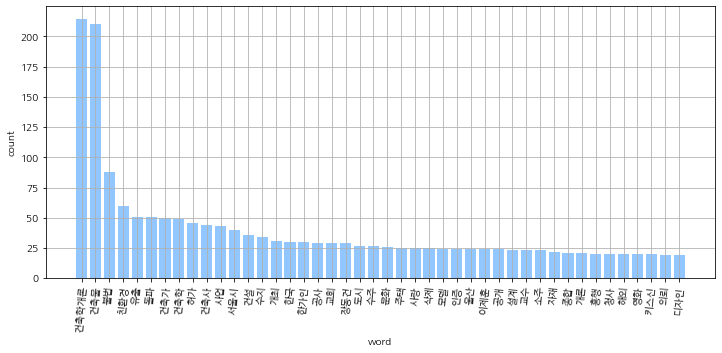

In [ ]:
# 히스토그램 표시 옵션
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(12,5))
plt.style.use('seaborn-pastel')
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.savefig('wordcount.png')
plt.show()


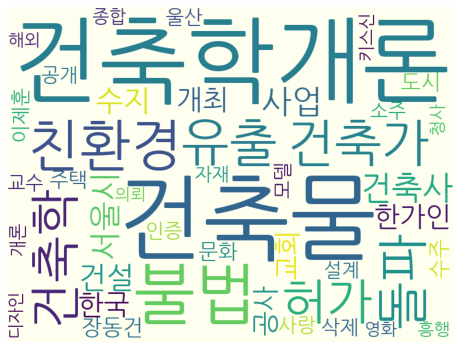

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file("wordcloud.png")